In [16]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import re #to handle regular expression when replacing
#let's import a library do deal with stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#needed for ex3 e)
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split



#ex1
df = pd.read_csv('sms_spam.csv')
print(df)

      type                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5569  spam  This is the 2nd time we have tried 2 contact u...
5570   ham               Will ü b going to esplanade fr home?
5571   ham  Pity, * was in mood for that. So...any other s...
5572   ham  The guy did some bitching but I acted like i'd...
5573   ham                         Rofl. Its true to its name

[5574 rows x 2 columns]


[nltk_data] Downloading package stopwords to /home/joao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
#ex2 - explore teh dataset
#a) View some Ham/Spam messages
print('Ham Messages:')
print(df[df['type'] == 'ham'].head(3))

print()

print('Spam Messages:')
print(df[df['type'] == 'spam'].head(3))

Ham Messages:
  type                                               text
0  ham  Go until jurong point, crazy.. Available only ...
1  ham                      Ok lar... Joking wif u oni...
3  ham  U dun say so early hor... U c already then say...

Spam Messages:
   type                                               text
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
8  spam  WINNER!! As a valued network customer you have...


In [18]:
#ex2
#b)
#View the sms with highest number of words
#AKA
#view the sms with the highest length after a split (" ")

#let's create a new column, "WordCount", which has information on the size of the text
df['wordCount'] = df['text'].str.split().apply(len)

#let's sort and see which texts have the most number of words
print(df.sort_values(by=['wordCount'], ascending=[False]))

# Assuming df is your DataFrame
df_sorted = df.sort_values(by=['wordCount'], ascending=[False])
print(f"The biggest number of words a text has, is {df_sorted.iloc[0]['wordCount']}")

     type                                               text  wordCount
1085  ham  For me the love should start with attraction.i...        171
1863  ham  The last thing i ever wanted to do was hurt yo...        162
2158  ham  Sad story of a Man - Last week was my b'day. M...        125
2849  ham  Sad story of a Man - Last week was my b'day. M...        125
2434  ham  Indians r poor but India is not a poor country...        109
...   ...                                                ...        ...
4498  ham                                                 Ok          1
3376  ham                                                 :)          1
2345  ham                                            Okie...          1
1700  ham                                              Ok...          1
2322  ham                                              Ok...          1

[5574 rows x 3 columns]
The biggest number of words a text has, is 171


ham     4827
spam     747
Name: type, dtype: int64


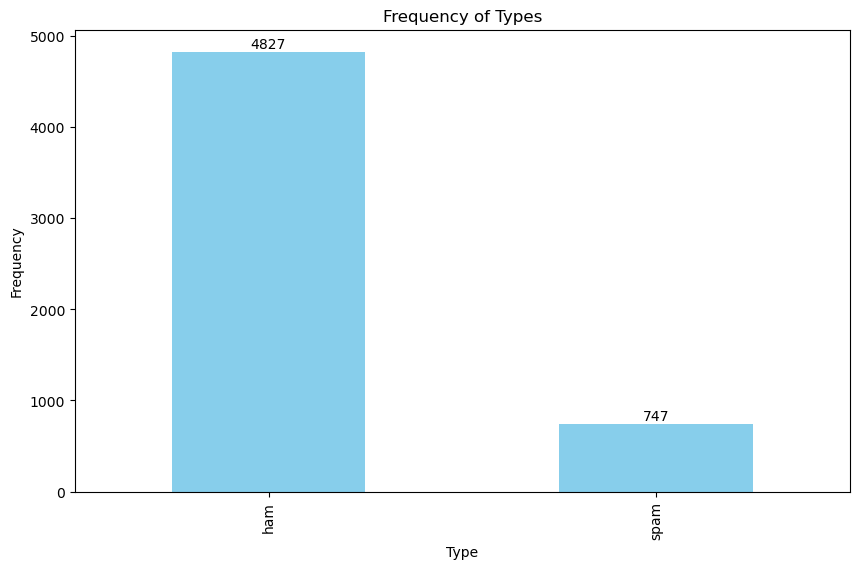

In [19]:
#ex2
#c)
#Check the distribution of the target attribute
#Let's check how many "ham" or "spam" messags we have

#with we can check oh many ham and spam messages we have
print(df['type'].value_counts())

#To make this even more interesting, let's create an histogram
type_counts = df['type'].value_counts()

# Create a bar plot (histogram) of type frequencies with labels
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = type_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Types')
plt.xlabel('Type')
plt.ylabel('Frequency')

# Add labels on top of each bar
for i, v in enumerate(type_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

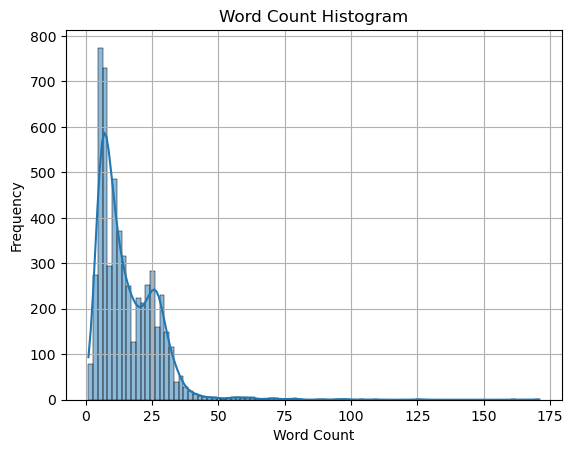

In [20]:
#ex2
#d)
#make an histogram with the distribution of the number of words in the texts


word_count = df['wordCount']
# print(word_count)

sns.histplot(word_count, kde=True)
plt.title("Word Count Histogram")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [21]:
#ex3-Text Preprocessing
#let's develop a function, that does the following (in the displayed order aswell):
#1- Convert everything to lowercase
#2- Remove numbers (numerical characters)
#3- Remove special Characters
#4- Remove stopWords (in our case, english words)
#5- Reduce words to radical with a porter stemmer
special_characters = r'[!@#$%^&*()_+{}\[\]:;"\'<>,.?/\\|`\-=~]'

def text_preprocessing(txt):
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()

    transformed_txt = txt
    transformed_txt = transformed_txt.lower()
    transformed_txt = re.sub(r'\d', '', transformed_txt)
    transformed_txt = re.sub(special_characters, '', transformed_txt)
    words = transformed_txt.split()
    stopWords_removed = [word for word in words if word not in stop_words]
    stemmer_applied = [stemmer.stem(word) for word in stopWords_removed]
    return ' '.join(stemmer_applied).strip()
    

In [22]:
#ex4
#let's apply the function to our 'text' column
df['text_preprocessed'] = df['text'].apply(text_preprocessing)
print(df['text_preprocessed'])


#the guide doesn't ask for this, i just did it for testing purposes
# Save the DataFrame to the new CSV file with 'type' and 'text_preprocessed' columns
df[['type', 'text_preprocessed']].to_csv('trasnformed_spam_ham.csv', index=False)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5569    nd time tri contact u u £ pound prize claim ea...
5570                              ü b go esplanad fr home
5571                              piti mood soani suggest
5572    guy bitch act like id interest buy someth els ...
5573                                       rofl true name
Name: text_preprocessed, Length: 5574, dtype: object


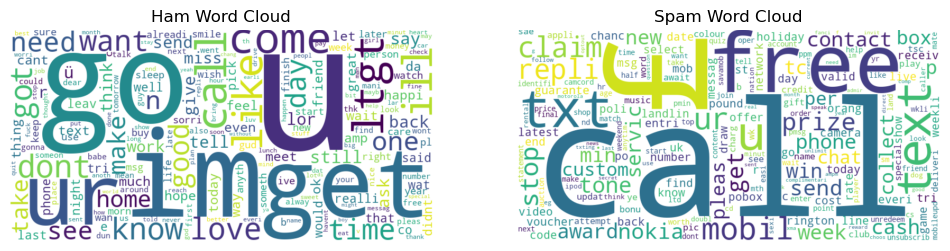

In [23]:
#ex5
#let's check the most popular messages, using a word cloud


#let's create 2 dfs, one for each type of message
ham_df = df[df['type'] == 'ham']
spam_df = df[df['type'] == 'spam']

#let's count the frequency of the words
ham_word_counts = Counter(''.join(ham_df['text_preprocessed']).split())
spam_word_counts = Counter(''.join(spam_df['text_preprocessed']).split())

#let's generate the world cloud for each type
ham_wordCloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ham_word_counts)
spam_wordCloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(spam_word_counts)

# Display word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordCloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spam_wordCloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.show()


In [24]:
#ex6
#With the count vectorizer function (sklearn), convert the corpus into a token/occurrence matrix. 4
# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the preprocessed text data
token_occurrence_matrix = vectorizer.fit_transform(df['text_preprocessed'])

# You now have a token/occurrence matrix in 'token_occurrence_matrix'

# You can convert this matrix to a DataFrame if needed
token_occurrence_df = pd.DataFrame(token_occurrence_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Print or use the token/occurrence matrix as needed
print(token_occurrence_df)

      aa  aah  aaniy  aaooooright  aathilov  aathiwher  ab  abbey  abdomen  \
0      0    0      0            0         0          0   0      0        0   
1      0    0      0            0         0          0   0      0        0   
2      0    0      0            0         0          0   0      0        0   
3      0    0      0            0         0          0   0      0        0   
4      0    0      0            0         0          0   0      0        0   
...   ..  ...    ...          ...       ...        ...  ..    ...      ...   
5569   0    0      0            0         0          0   0      0        0   
5570   0    0      0            0         0          0   0      0        0   
5571   0    0      0            0         0          0   0      0        0   
5572   0    0      0            0         0          0   0      0        0   
5573   0    0      0            0         0          0   0      0        0   

      abeg  ...  zhong  zindgi  zoe  zogtoriu  zoom  zouk  zs  

/tmp/ipykernel_7727/713574591.py:32: UserWarning: Glyph 37413 (\N{CJK UNIFIED IDEOGRAPH-9225}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_7727/713574591.py:32: UserWarning: Glyph 12328 (\N{HANGZHOU NUMERAL EIGHT}) missing from current font.
  plt.tight_layout()
/home/joao/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37413 (\N{CJK UNIFIED IDEOGRAPH-9225}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/joao/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12328 (\N{HANGZHOU NUMERAL EIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


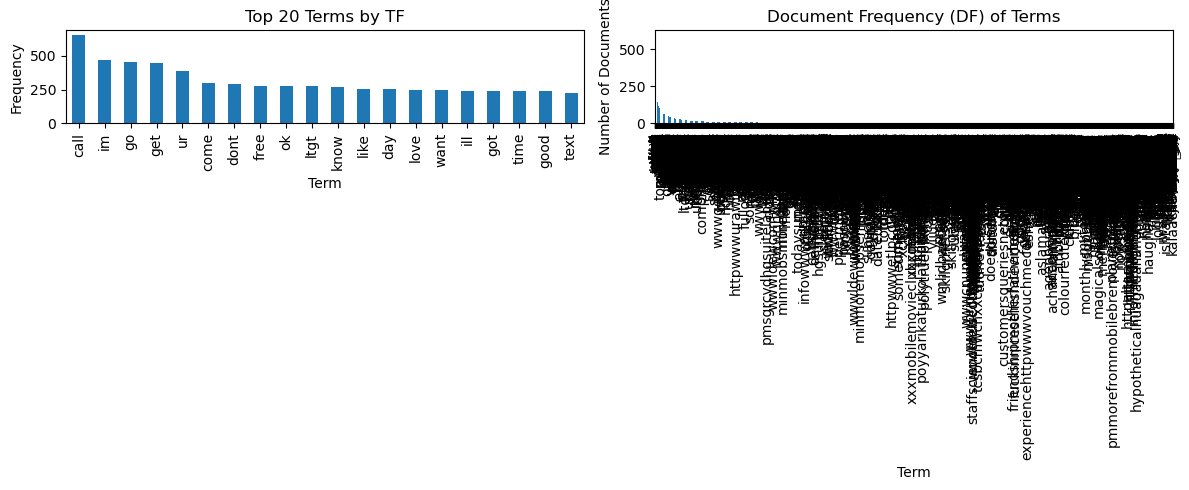

In [25]:
#ex7
#Now, with the previous token matrix, i have to decide what terms to maintain
#For example, extremely rare terms (with a number of appearances colse to 0), can be removed and won't affect the output of a model
#as, most likely, they don't provide extra meaning.

# Calculate term frequency (TF) - the sum of each term's occurrences in all SMS
term_frequency = token_occurrence_df.sum()

# Calculate document frequency (DF) - how many SMS messages each term appears in
document_frequency = token_occurrence_df.astype(bool).sum()

# Visualize term frequency and document frequency
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot the top N terms by TF
top_n = 20
plt.subplot(1, 2, 1)
term_frequency.sort_values(ascending=False).head(top_n).plot(kind='bar')
plt.title(f'Top {top_n} Terms by TF')
plt.xlabel('Term')
plt.ylabel('Frequency')

# Plot the terms by DF
plt.subplot(1, 2, 2)
document_frequency.sort_values(ascending=False).plot(kind='bar')
plt.title('Document Frequency (DF) of Terms')
plt.xlabel('Term')
plt.ylabel('Number of Documents')

plt.tight_layout()
plt.show()




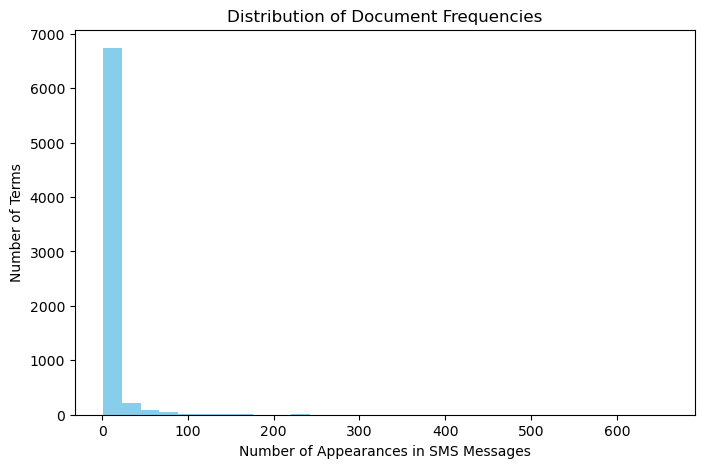

Threshold Count = 5: Number of terms retained = 1514


In [26]:
#let's find out the rarest terms and removed them. 
#YEET
threshold_number = 5

# Calculate document frequency (DF) - how many times each term appears in SMS messages
document_frequency = token_occurrence_df.sum()

# Visualize the distribution of document frequencies
plt.figure(figsize=(8, 5))
plt.hist(document_frequency, bins=30, color='skyblue')
plt.title('Distribution of Document Frequencies')
plt.xlabel('Number of Appearances in SMS Messages')
plt.ylabel('Number of Terms')
plt.show()

# Set a threshold based on the minimum number of appearances (e.g., 5 times)
threshold_count = threshold_number

# Identify and retain terms that meet or exceed the threshold count
retained_terms = document_frequency[document_frequency >= threshold_count]

# Print the number of terms retained and the threshold count
num_terms_retained = len(retained_terms)
print(f"Threshold Count = {threshold_count}: Number of terms retained = {num_terms_retained}")



In [27]:
# Set the document frequency (DF) threshold
df_threshold = threshold_number

# Filter terms based on the DF threshold
selected_terms = token_occurrence_df.columns[token_occurrence_df.sum() >= df_threshold]

# Create a new DataFrame with the selected terms
selected_token_occurrence_df = token_occurrence_df[selected_terms]

# Print or use the selected terms and corresponding occurrences as needed
print(selected_token_occurrence_df)


      abiola  abl  abt  accept  access  account  across  act  activ  actual  \
0          0    0    0       0       0        0       0    0      0       0   
1          0    0    0       0       0        0       0    0      0       0   
2          0    0    0       0       0        0       0    0      0       0   
3          0    0    0       0       0        0       0    0      0       0   
4          0    0    0       0       0        0       0    0      0       0   
...      ...  ...  ...     ...     ...      ...     ...  ...    ...     ...   
5569       0    0    0       0       0        0       0    0      0       0   
5570       0    0    0       0       0        0       0    0      0       0   
5571       0    0    0       0       0        0       0    0      0       0   
5572       0    0    0       0       0        0       0    1      0       0   
5573       0    0    0       0       0        0       0    0      0       0   

      ...  yoga  yogasana  youd  youll  your  youv 

In [28]:
#ex8
#let's split the data (70/30)

X = token_occurrence_df
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [29]:
#ex9
#

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Create a list of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Naive Bayes', MultinomialNB()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC())
]

# Perform cross-validation for each classifier
for name, classifier in classifiers:
    scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring='accuracy')
    print(f'{name}: Mean Accuracy: {scores.mean()}, Standard Deviation: {scores.std()}')


Logistic Regression: Mean Accuracy: 0.9761630270837433, Standard Deviation: 0.007241698457364157
Decision Tree: Mean Accuracy: 0.9597580169191422, Standard Deviation: 0.008933750537384544
Naive Bayes: Mean Accuracy: 0.970267558528428, Standard Deviation: 0.007249300499291864
KNN: Mean Accuracy: 0.9138697619516034, Standard Deviation: 0.0076908411306860006
SVM: Mean Accuracy: 0.9705226572234246, Standard Deviation: 0.00629291485379322


In [30]:
#ex10

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score using the appropriate class label ('spam' or 'ham')
precision = precision_score(y_test, y_pred, pos_label='spam')  # Use 'spam' as pos_label
recall = recall_score(y_test, y_pred, pos_label='spam')  # Use 'spam' as pos_label
f1 = f1_score(y_test, y_pred, pos_label='spam')  # Use 'spam' as pos_label

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)


## Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", cm)

#98% accuracy, holy hell

Accuracy: 0.9838613269575612
Precision: 1.0
Recall: 0.8794642857142857
F1-score: 0.9358669833729216
Confusion Matrix:
 [[1449    0]
 [  27  197]]
